In [ ]:
!pip install numpy==1.21.6 pandas==1.3.5 matplotlib===3.3.4 scanpy==1.7.2 igraph==0.9.8 scvelo==0.2.4 loompy==3.0.6 anndata==0.7.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%load_ext rpy2.ipython

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import scanpy as sc
import igraph
import scvelo as scv
import loompy as lmp
import anndata

In [ ]:
!mkdir input-files
!cp /content/drive/MyDrive/scRNA/Flox.loom input-files/Flox.loom  
!cp /content/drive/MyDrive/scRNA/FMese_cellID_obs.csv input-files/FMese_cellID_obs.csv 
!ls -lah input-files

mkdir: cannot create directory ‘input-files’: File exists
total 267M
drwxr-xr-x 2 root root 4.0K Dec 19 01:33 .
drwxr-xr-x 1 root root 4.0K Dec 19 01:42 ..
-rw------- 1 root root 112M Dec 19 01:32 DD.loom
-rw------- 1 root root  86K Dec 19 01:32 DMese_cellID_obs.csv
-rw------- 1 root root 154M Dec 19 01:58 Flox.loom
-rw------- 1 root root 131K Dec 19 01:58 FMese_cellID_obs.csv
-rw------- 1 root root 380K Dec 19 01:33 Mese_cell_embeddings.csv
-rw------- 1 root root 276K Dec 19 01:55 Mese_cluster_color.csv


In [ ]:
FMese = anndata.read_loom("./input-files/Flox.loom")
FMese_obs = pd.read_csv("./input-files/FMese_cellID_obs.csv")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [ ]:
VelFEpi = scv.read('./input-files/Flox.loom', cache=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


In [ ]:
VelFEpi.obs

""
CellID
cellranger-Flox:AAAGTCCAGAGGCGGAx
cellranger-Flox:AAATGGAGTGGCAACAx
cellranger-Flox:AACAAGAGTCGCGGTTx
cellranger-Flox:AAAGGGCTCGCCGTGAx
cellranger-Flox:AAACCCAAGGTTGACGx
...
cellranger-Flox:TTTCCTCCATCAGTCAx
cellranger-Flox:TTTGACTTCGGCTTCTx
cellranger-Flox:TTTCCTCCATCGATACx


In [ ]:
FMese = FMese[np.isin(FMese.obs.index,FMese_obs["x"])]

In [ ]:
!cp /content/drive/MyDrive/scRNA/DD.loom input-files/DD.loom  
!cp /content/drive/MyDrive/scRNA/DMese_cellID_obs.csv input-files/DMese_cellID_obs.csv 
!ls -lah input-files

total 267M
drwxr-xr-x 2 root root 4.0K Dec 19 01:33 .
drwxr-xr-x 1 root root 4.0K Dec 19 01:42 ..
-rw------- 1 root root 112M Dec 19 01:59 DD.loom
-rw------- 1 root root  86K Dec 19 01:59 DMese_cellID_obs.csv
-rw------- 1 root root 154M Dec 19 01:58 Flox.loom
-rw------- 1 root root 131K Dec 19 01:58 FMese_cellID_obs.csv
-rw------- 1 root root 380K Dec 19 01:33 Mese_cell_embeddings.csv
-rw------- 1 root root 276K Dec 19 01:55 Mese_cluster_color.csv


In [ ]:
DMese = anndata.read_loom("./input-files/DD.loom")
DMese_obs = pd.read_csv("./input-files/DMese_cellID_obs.csv")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [ ]:
DMese = DMese[np.isin(DMese.obs.index,DMese_obs["x"])]

In [ ]:
FMese

View of AnnData object with n_obs × n_vars = 3800 × 32285
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [ ]:
DMese

View of AnnData object with n_obs × n_vars = 2572 × 32285
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [ ]:
FMese.obs.index

Index(['cellranger-Flox:AAATGGAGTGGCAACAx',
       'cellranger-Flox:AAACCCAAGGTTGACGx',
       'cellranger-Flox:AAATGGACACGTGTGCx',
       'cellranger-Flox:AACAAAGCATACCACAx',
       'cellranger-Flox:AAAGAACAGAGCCATGx',
       'cellranger-Flox:AAAGTGATCGCCTTGTx',
       'cellranger-Flox:AAAGGTACACCCTGTTx',
       'cellranger-Flox:AAAGGATGTTCACCGGx',
       'cellranger-Flox:AACAACCTCGAGCTGCx',
       'cellranger-Flox:AAAGTGATCCAAGAGGx',
       ...
       'cellranger-Flox:TTTGACTAGAACAGGAx',
       'cellranger-Flox:TTTCGATCACACACTAx',
       'cellranger-Flox:TTTGGTTGTCATCTAGx',
       'cellranger-Flox:TTTGACTCACACCTGGx',
       'cellranger-Flox:TTTGGTTGTTATGTCGx',
       'cellranger-Flox:TTTGTTGGTACGAGCAx',
       'cellranger-Flox:TTTGGAGTCTACTGCCx',
       'cellranger-Flox:TTTGACTTCGGCTTCTx',
       'cellranger-Flox:TTTGGAGTCCTGGCTTx',
       'cellranger-Flox:TTTCGATCAGAGTCAGx'],
      dtype='object', name='CellID', length=3800)

In [ ]:
DMese.obs.index

Index(['cellranger-DD:AACAAAGTCTCTTGCGx', 'cellranger-DD:AAAGAACGTTGCTGATx',
       'cellranger-DD:AACAACCAGCAAGCCAx', 'cellranger-DD:AACAAGAAGTCCGCGTx',
       'cellranger-DD:AAAGGTATCTCTCTTCx', 'cellranger-DD:AACCACAAGTTGTACCx',
       'cellranger-DD:AAAGTCCGTTACGGAGx', 'cellranger-DD:AAAGGTACAACCCTAAx',
       'cellranger-DD:AACCATGTCGCGGACTx', 'cellranger-DD:AAATGGACATGTGTCAx',
       ...
       'cellranger-DD:TTTCAGTTCTGTTCATx', 'cellranger-DD:TTTCGATAGTCCTACAx',
       'cellranger-DD:TTTCACAAGCATGATAx', 'cellranger-DD:TTTACGTAGTGGTTCTx',
       'cellranger-DD:TTTGGTTAGGTGTGACx', 'cellranger-DD:TTTACCACAATAACCCx',
       'cellranger-DD:TTTGTTGTCTGAACGTx', 'cellranger-DD:TTTGTTGTCGAAGGACx',
       'cellranger-DD:TTTGTTGTCTGTACAGx', 'cellranger-DD:TTTGTTGTCCACGTAAx'],
      dtype='object', name='CellID', length=2572)

In [ ]:
FMese.var_names_make_unique()
DMese.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [ ]:
Mese = FMese.concatenate([DMese])

In [ ]:
Mese.obs.index

Index(['cellranger-Flox:AAATGGAGTGGCAACAx-0',
       'cellranger-Flox:AAACCCAAGGTTGACGx-0',
       'cellranger-Flox:AAATGGACACGTGTGCx-0',
       'cellranger-Flox:AACAAAGCATACCACAx-0',
       'cellranger-Flox:AAAGAACAGAGCCATGx-0',
       'cellranger-Flox:AAAGTGATCGCCTTGTx-0',
       'cellranger-Flox:AAAGGTACACCCTGTTx-0',
       'cellranger-Flox:AAAGGATGTTCACCGGx-0',
       'cellranger-Flox:AACAACCTCGAGCTGCx-0',
       'cellranger-Flox:AAAGTGATCCAAGAGGx-0',
       ...
       'cellranger-DD:TTTCAGTTCTGTTCATx-1',
       'cellranger-DD:TTTCGATAGTCCTACAx-1',
       'cellranger-DD:TTTCACAAGCATGATAx-1',
       'cellranger-DD:TTTACGTAGTGGTTCTx-1',
       'cellranger-DD:TTTGGTTAGGTGTGACx-1',
       'cellranger-DD:TTTACCACAATAACCCx-1',
       'cellranger-DD:TTTGTTGTCTGAACGTx-1',
       'cellranger-DD:TTTGTTGTCGAAGGACx-1',
       'cellranger-DD:TTTGTTGTCTGTACAGx-1',
       'cellranger-DD:TTTGTTGTCCACGTAAx-1'],
      dtype='object', name='CellID', length=6372)

In [ ]:
Mese_index = pd.DataFrame(Mese.obs.index)
Mese_index = Mese_index.rename(columns = {0:'CellID'})

In [ ]:
Mese_index

,CellID
0,cellranger-Flox:AAATGGAGTGGCAACAx-0
1,cellranger-Flox:AAACCCAAGGTTGACGx-0
2,cellranger-Flox:AAATGGACACGTGTGCx-0
3,cellranger-Flox:AACAAAGCATACCACAx-0
4,cellranger-Flox:AAAGAACAGAGCCATGx-0
...,...
6367,cellranger-DD:TTTACCACAATAACCCx-1
6368,cellranger-DD:TTTGTTGTCTGAACGTx-1
6369,cellranger-DD:TTTGTTGTCGAAGGACx-1
6370,cellranger-DD:TTTGTTGTCTGTACAGx-1


In [ ]:
from google.colab import files
Mese_index.to_csv('Mese_index.csv')
files.download('Mese_index.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp /content/drive/MyDrive/scRNA/Mese_cell_embeddings.csv input-files/Mese_cell_embeddings.csv 
umap = pd.read_csv("./input-files/Mese_cell_embeddings.csv")
umap_cord = umap.rename(columns = {'Unnamed: 0':'CellID'})

In [ ]:
umap_cord

,CellID,UMAP_1,UMAP_2
0,cellranger-Flox:AAATGGAGTGGCAACAx-0,7.712656,3.615491
1,cellranger-Flox:AAACCCAAGGTTGACGx-0,-8.758511,0.516017
2,cellranger-Flox:AAATGGACACGTGTGCx-0,-0.903917,1.904154
3,cellranger-Flox:AACAAAGCATACCACAx-0,-5.254521,0.277956
4,cellranger-Flox:AAAGAACAGAGCCATGx-0,-11.594924,3.491867
...,...,...,...
6367,cellranger-DD:TTTACCACAATAACCCx-1,3.254673,-9.589429
6368,cellranger-DD:TTTGTTGTCTGAACGTx-1,6.523616,14.879680
6369,cellranger-DD:TTTGTTGTCGAAGGACx-1,4.710582,-10.028806
6370,cellranger-DD:TTTGTTGTCTGTACAGx-1,3.333582,-10.712592


In [ ]:
umap_ordered = Mese_index.merge(umap_cord, on = "CellID")

In [ ]:
umap_ordered

,CellID,UMAP_1,UMAP_2
0,cellranger-Flox:AAATGGAGTGGCAACAx-0,7.712656,3.615491
1,cellranger-Flox:AAACCCAAGGTTGACGx-0,-8.758511,0.516017
2,cellranger-Flox:AAATGGACACGTGTGCx-0,-0.903917,1.904154
3,cellranger-Flox:AACAAAGCATACCACAx-0,-5.254521,0.277956
4,cellranger-Flox:AAAGAACAGAGCCATGx-0,-11.594924,3.491867
...,...,...,...
6367,cellranger-DD:TTTACCACAATAACCCx-1,3.254673,-9.589429
6368,cellranger-DD:TTTGTTGTCTGAACGTx-1,6.523616,14.879680
6369,cellranger-DD:TTTGTTGTCGAAGGACx-1,4.710582,-10.028806
6370,cellranger-DD:TTTGTTGTCTGTACAGx-1,3.333582,-10.712592


In [ ]:
umap_ordered = umap_ordered.iloc[:,1:]
Mese.obsm['X_umap'] = umap_ordered.values

In [ ]:
!cp /content/drive/MyDrive/scRNA/Mese_cluster_color.csv input-files/Mese_cluster_color.csv 
color = pd.read_csv("./input-files/Mese_cluster_color.csv")
color_cord = color.rename(columns = {'Unnamed: 0':'CellID'})

In [ ]:
color

,CellID,color
0,cellranger-Flox:AAATGGAGTGGCAACAx-0,#00b3f1
1,cellranger-Flox:AAACCCAAGGTTGACGx-0,#f8766d
2,cellranger-Flox:AAATGGACACGTGTGCx-0,#19b700
3,cellranger-Flox:AACAAAGCATACCACAx-0,#b4a000
4,cellranger-Flox:AAAGAACAGAGCCATGx-0,#d69100
...,...,...
6367,cellranger-DD:TTTACCACAATAACCCx-1,#ef7f48
6368,cellranger-DD:TTTGTTGTCTGAACGTx-1,#9ea700
6369,cellranger-DD:TTTGTTGTCGAAGGACx-1,#ef7f48
6370,cellranger-DD:TTTGTTGTCTGTACAGx-1,#ef7f48


In [ ]:
color_ordered = Mese_index.merge(color_cord, on = "CellID")

In [ ]:
color_ordered

,CellID,color
0,cellranger-Flox:AAATGGAGTGGCAACAx-0,#00b3f1
1,cellranger-Flox:AAACCCAAGGTTGACGx-0,#f8766d
2,cellranger-Flox:AAATGGACACGTGTGCx-0,#19b700
3,cellranger-Flox:AACAAAGCATACCACAx-0,#b4a000
4,cellranger-Flox:AAAGAACAGAGCCATGx-0,#d69100
...,...,...
6367,cellranger-DD:TTTACCACAATAACCCx-1,#ef7f48
6368,cellranger-DD:TTTGTTGTCTGAACGTx-1,#9ea700
6369,cellranger-DD:TTTGTTGTCGAAGGACx-1,#ef7f48
6370,cellranger-DD:TTTGTTGTCTGTACAGx-1,#ef7f48


In [ ]:
color_ordered = color_ordered.iloc[:,1:]
Mese.uns['Cluster_colors'] = color_ordered.values

In [ ]:
color_ordered

,color
0,#00b3f1
1,#f8766d
2,#19b700
3,#b4a000
4,#d69100
...,...
6367,#ef7f48
6368,#9ea700
6369,#ef7f48
6370,#ef7f48


Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:14) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:10) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:48) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/2 cores)


  0%|          | 0/6372 [00:00<?, ?cells/s]

    finished (0:06:46) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:04) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


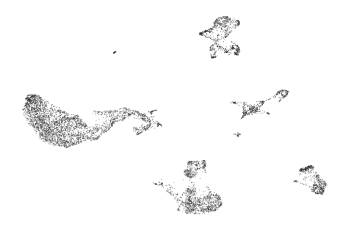

In [ ]:
scv.pp.filter_and_normalize(Mese)
scv.pp.moments(Mese)
scv.tl.velocity(Mese, mode = "stochastic")
scv.tl.velocity_graph(Mese)
scv.pl.velocity_embedding(Mese, basis = 'umap')

saving figure to file ./figures/scvelo_scVelo-umap-cluster.png


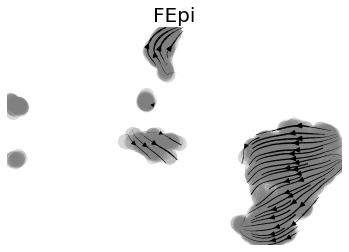

In [ ]:
scv.pl.velocity_embedding_stream(FEpi,basis="umap",title='FEpi',fontsize=20,legend_fontsize=20,min_mass=2,save='scVelo-umap-cluster.png')

saving figure to file ./figures/scvelo_scVelo-umap-cluster.png


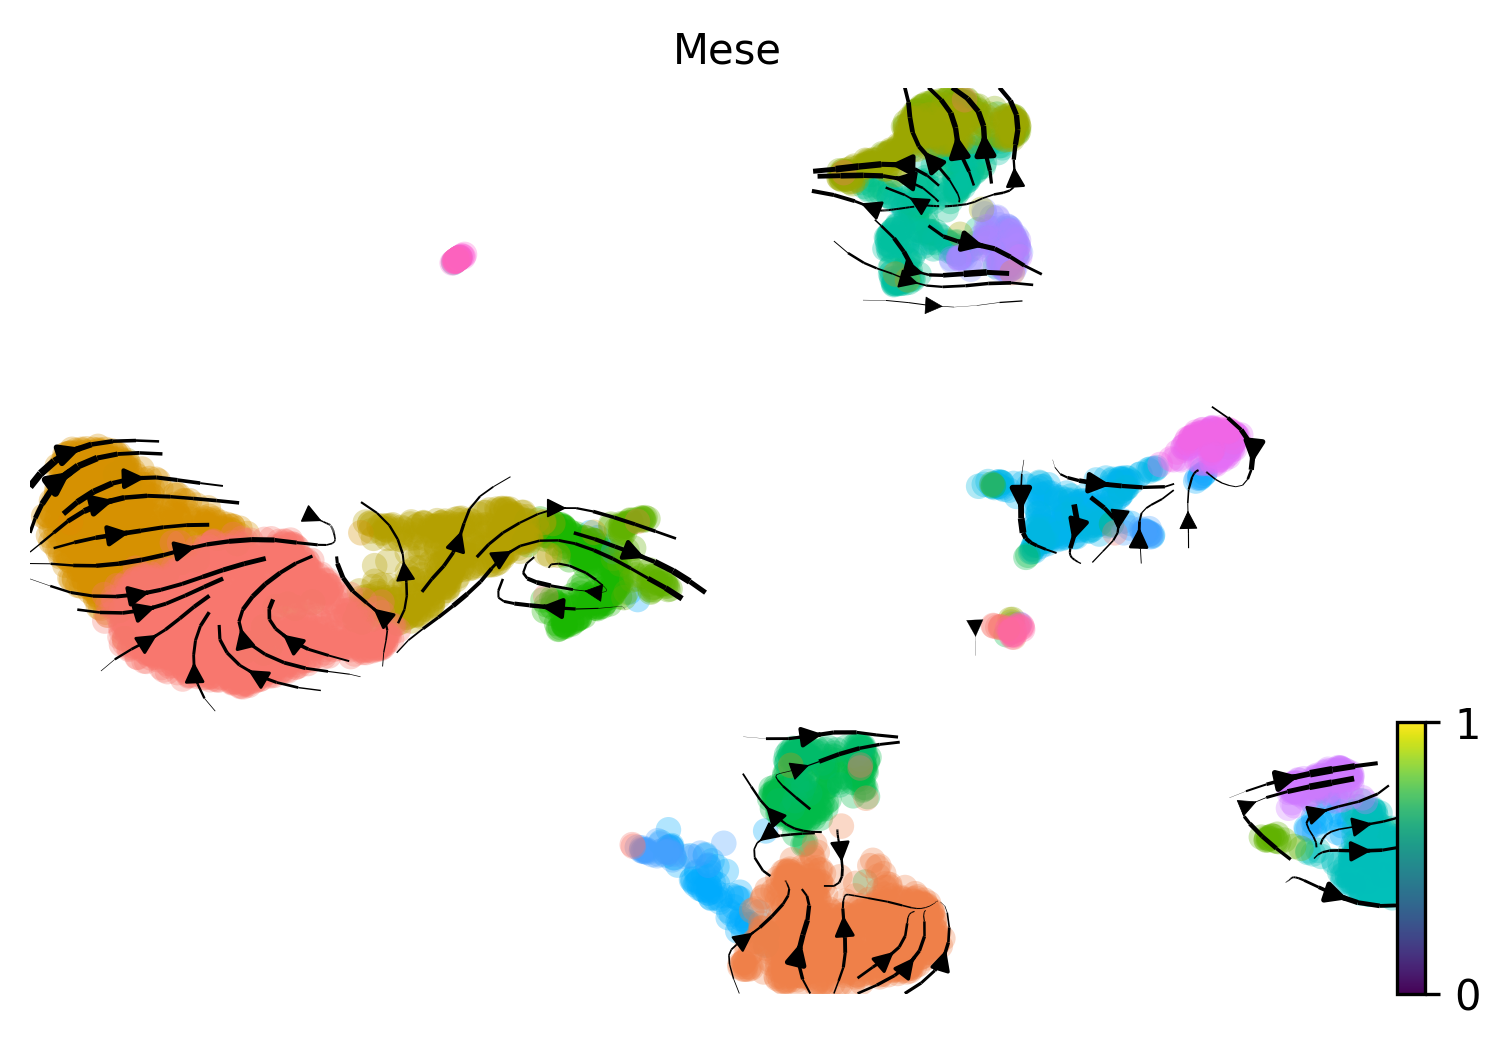

In [ ]:
scv.pl.velocity_embedding_stream(Mese,basis="umap",title='Mese',color=Mese.uns['Cluster_colors'],dpi=300,save='scVelo-umap-cluster.png')

saving figure to file ./figures/scvelo_embedding_grid.png


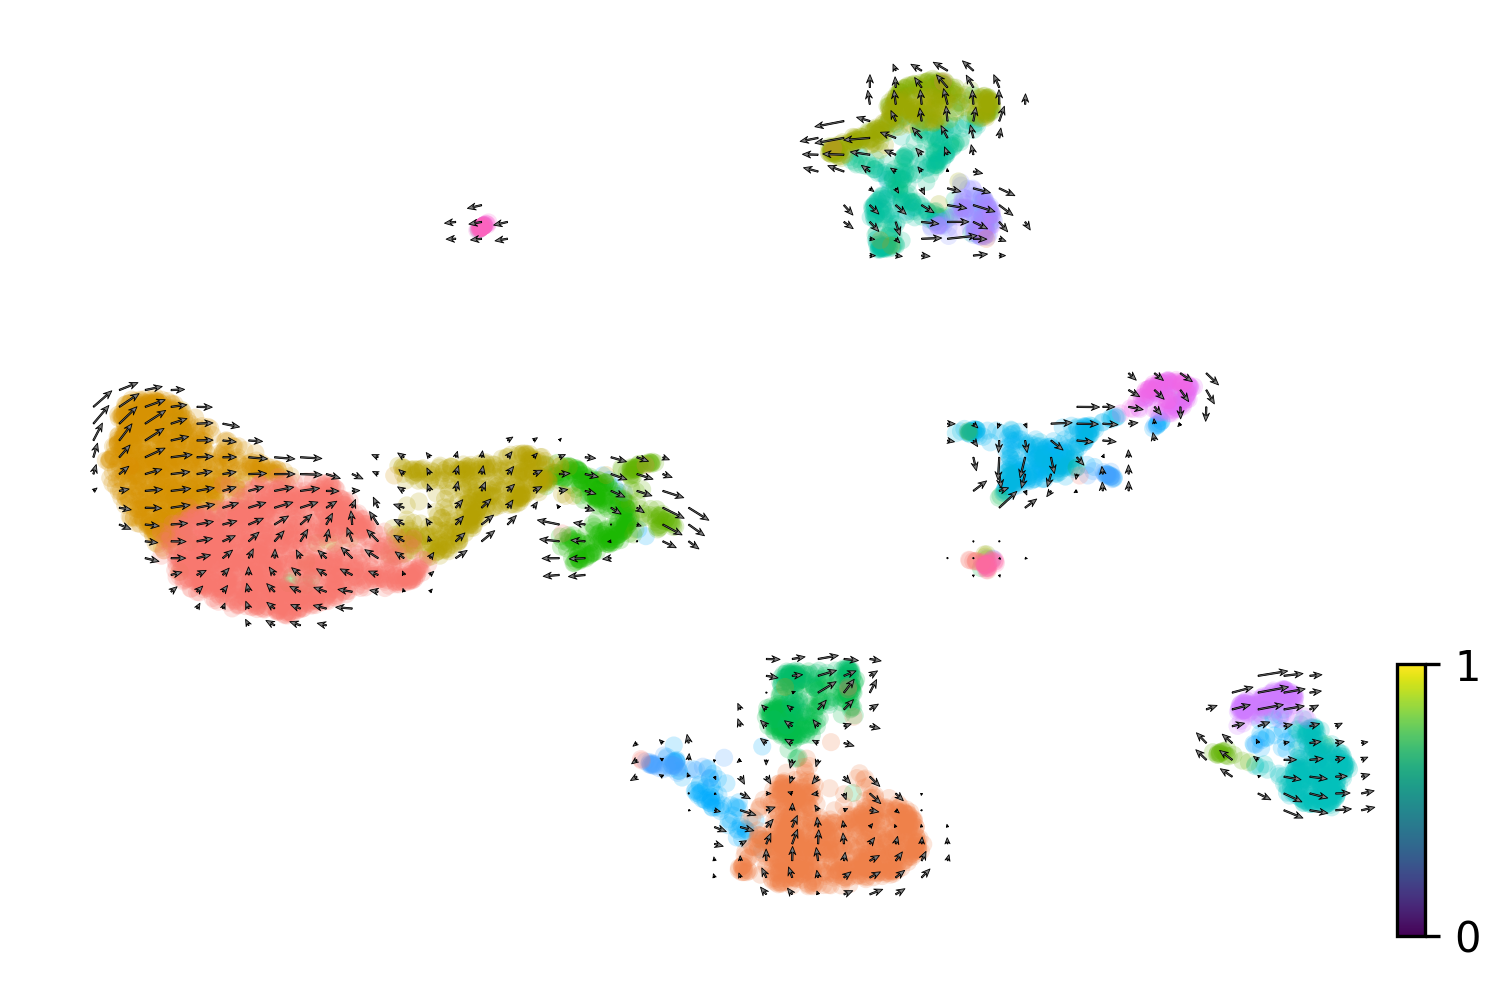

In [ ]:
scv.pl.velocity_embedding_grid(Mese, basis='umap', color=Mese.uns['Cluster_colors'], dpi=300,save='embedding_grid.png', scale=0.5)

In [ ]:
!cp /content/drive/MyDrive/scRNA/DEpi_cellID_obs.csv input-files/DEpi_cellID_obs.csv 
!ls -lah input-files

In [ ]:
DEpi = anndata.read_loom("./input-files/DD.loom")
DEpi_obs = pd.read_csv("./input-files/DEpi_cellID_obs.csv")

In [ ]:
DEpi = DEpi[np.isin(DEpi.obs.index,DEpi_obs["x"])]

In [ ]:
DEpi_index = pd.DataFrame(DEpi.obs.index)
DEpi_index = DEpi_index.rename(columns = {0:'CellID'})

In [ ]:
DEpi_obs["x"]

In [ ]:
DEpi_index

In [ ]:
from google.colab import files
DEpi_index.to_csv('DEpi_index.csv')
files.download('DEpi_index.csv')

In [ ]:
!cp /content/drive/MyDrive/scRNA/DEpi_cell_embeddings_filter.csv input-files/DEpi_cell_embeddings_filter.csv 
umap = pd.read_csv("./input-files/DEpi_cell_embeddings_filter.csv")
umap_cord = umap.rename(columns = {'Unnamed: 0':'CellID'})

In [ ]:
umap_ordered = DEpi_index.merge(umap_cord, on = "CellID")

In [ ]:
umap_ordered = umap_ordered.iloc[:,1:]
DEpi.obsm['X_umap'] = umap_ordered.values

In [ ]:
!cp /content/drive/MyDrive/scRNA/DEpi_cluster_color.csv input-files/DEpi_cluster_color.csv 
color = pd.read_csv("./input-files/DEpi_cluster_color.csv")
color_cord = color.rename(columns = {'Unnamed: 0':'CellID'})

In [ ]:
color_ordered = DEpi_index.merge(color_cord, on = "CellID")

In [ ]:
color_ordered = color_ordered.iloc[:,1:]
DEpi.uns['Cluster_colors'] = color_ordered.values

In [ ]:
scv.pp.filter_and_normalize(DEpi)
scv.pp.moments(DEpi)
scv.tl.velocity(DEpi, mode = "stochastic")
scv.tl.velocity_graph(DEpi)
scv.pl.velocity_embedding(DEpi, basis = 'umap')

In [ ]:
scv.pl.velocity_embedding_stream(DEpi,basis="umap",title='DEpi',color=DEpi.uns['Cluster_colors'],dpi=300,save='scVelo-umap-cluster.png')

In [ ]:
scv.pl.velocity_embedding_grid(DEpi, basis='umap', color=DEpi.uns['Cluster_colors'], dpi=300,save='embedding_grid.png', scale=0.5)

In [ ]:
!cp /content/drive/MyDrive/scRNA/FEpi_cellID_obs.csv input-files/FEpi_cellID_obs.csv 
!ls -lah input-files

In [ ]:
FEpi = anndata.read_loom("./input-files/Flox.loom")
FEpi_obs = pd.read_csv("./input-files/FEpi_cellID_obs.csv")

In [ ]:
FEpi = FEpi[np.isin(FEpi.obs.index,FEpi_obs["x"])]

In [ ]:
FEpi_index = pd.DataFrame(FEpi.obs.index)
FEpi_index = FEpi_index.rename(columns = {0:'CellID'})

In [ ]:
FEpi_obs["x"]

In [ ]:
FEpi_index

In [ ]:
from google.colab import files
FEpi_index.to_csv('FEpi_index.csv')
files.download('FEpi_index.csv')

In [ ]:
!cp /content/drive/MyDrive/scRNA/FEpi_cell_embeddings_filter.csv input-files/FEpi_cell_embeddings_filter.csv 
umap = pd.read_csv("./input-files/FEpi_cell_embeddings_filter.csv")
umap_cord = umap.rename(columns = {'Unnamed: 0':'CellID'})

In [ ]:
umap_ordered = FEpi_index.merge(umap_cord, on = "CellID")

In [ ]:
umap_ordered = umap_ordered.iloc[:,1:]
FEpi.obsm['X_umap'] = umap_ordered.values

In [ ]:
!cp /content/drive/MyDrive/scRNA/FEpi_cluster_color.csv input-files/FEpi_cluster_color.csv 
color = pd.read_csv("./input-files/FEpi_cluster_color.csv")
color_cord = color.rename(columns = {'Unnamed: 0':'CellID'})

In [ ]:
color_ordered = FEpi_index.merge(color_cord, on = "CellID")

In [ ]:
color_ordered = color_ordered.iloc[:,1:]
FEpi.uns['Cluster_colors'] = color_ordered.values

In [ ]:
scv.pp.filter_and_normalize(FEpi)
scv.pp.moments(FEpi)
scv.tl.velocity(FEpi, mode = "stochastic")
scv.tl.velocity_graph(FEpi)
scv.pl.velocity_embedding(FEpi, basis = 'umap')

In [ ]:
scv.pl.velocity_embedding_stream(FEpi,basis="umap",title='FEpi',color=FEpi.uns['Cluster_colors'],dpi=300,save='scVelo-umap-cluster.png')

In [ ]:
scv.pl.velocity_embedding_grid(FEpi, basis='umap', color=FEpi.uns['Cluster_colors'], dpi=300,save='embedding_grid.png', scale=0.5)